# Import dataset

In [1]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import pickle
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

#set folder path
folder = 'data'
#fd = folder + '/uncorrupted_signal_folder'
#fd_km = fd + '/Clusters4096'
fd = folder
fd_km = fd

In [2]:
data_train = pd.read_pickle(fd_km + '/data_train_v1').reset_index().iloc[:,1:] #full set
data_test = pd.read_pickle(fd_km + '/data_test_v1').reset_index().iloc[:,1:]  

In [3]:
data_train

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,68053
1,1,500,0.000684,0.000693,0.000695,67553
2,1,1000,0.000684,0.000693,0.000695,67053
3,1,1500,0.000684,0.000693,0.000695,66553
4,1,2000,0.000684,0.000693,0.000695,66053
...,...,...,...,...,...,...
1385078,10000,66500,0.000118,0.000253,0.000761,2393
1385079,10000,67000,0.000097,0.000186,0.000755,1893
1385080,10000,67500,0.000078,0.000113,0.000743,1393
1385081,10000,68000,0.000060,0.000037,0.000718,893


In [4]:
data_train[data_train.ID == 1]

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,68053
1,1,500,0.000684,0.000693,0.000695,67553
2,1,1000,0.000684,0.000693,0.000695,67053
3,1,1500,0.000684,0.000693,0.000695,66553
4,1,2000,0.000684,0.000693,0.000695,66053
...,...,...,...,...,...,...
132,1,66000,0.000095,0.000178,0.000754,2053
133,1,66500,0.000078,0.000112,0.000743,1553
134,1,67000,0.000062,0.000044,0.000721,1053
135,1,67500,0.000047,-0.000022,0.000684,553


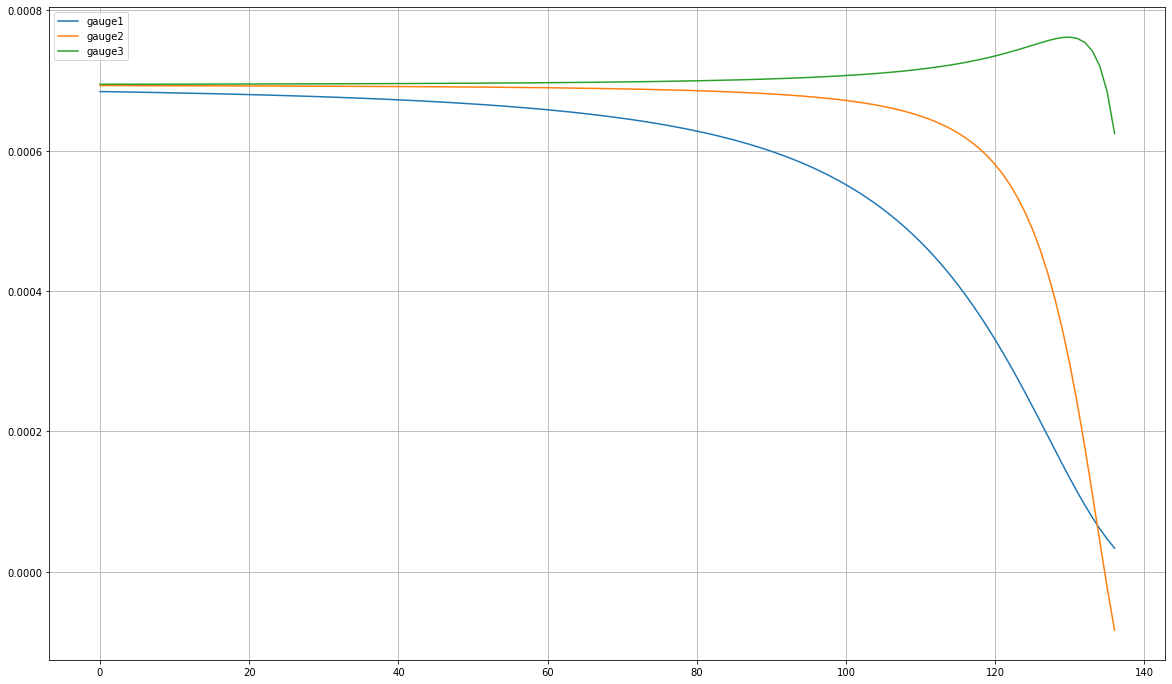

In [5]:
plt.figure(figsize=(20, 12))
plt.plot(data_train[data_train.ID == 1]['gauge1'],label= 'gauge1')
plt.plot(data_train[data_train.ID == 1][ 'gauge2'],label= 'gauge2')
plt.plot(data_train[data_train.ID == 1]['gauge3'], label= 'gauge3')
plt.grid()
plt.legend()
plt.show()

In [6]:
data_train.head(10)

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,68053
1,1,500,0.000684,0.000693,0.000695,67553
2,1,1000,0.000684,0.000693,0.000695,67053
3,1,1500,0.000684,0.000693,0.000695,66553
4,1,2000,0.000684,0.000693,0.000695,66053
5,1,2500,0.000683,0.000693,0.000695,65553
6,1,3000,0.000683,0.000693,0.000695,65053
7,1,3500,0.000683,0.000693,0.000695,64553
8,1,4000,0.000683,0.000693,0.000695,64053
9,1,4500,0.000683,0.000693,0.000695,63553


In [7]:
data_test[data_test.ID==1]

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,64540
1,1,500,0.000684,0.000693,0.000695,64040
2,1,1000,0.000684,0.000693,0.000695,63540
3,1,1500,0.000684,0.000693,0.000695,63040
4,1,2000,0.000684,0.000693,0.000695,62540
5,1,2500,0.000684,0.000693,0.000695,62040
6,1,3000,0.000683,0.000693,0.000695,61540
7,1,3500,0.000683,0.000693,0.000695,61040
8,1,4000,0.000683,0.000693,0.000695,60540
9,1,4500,0.000683,0.000693,0.000695,60040


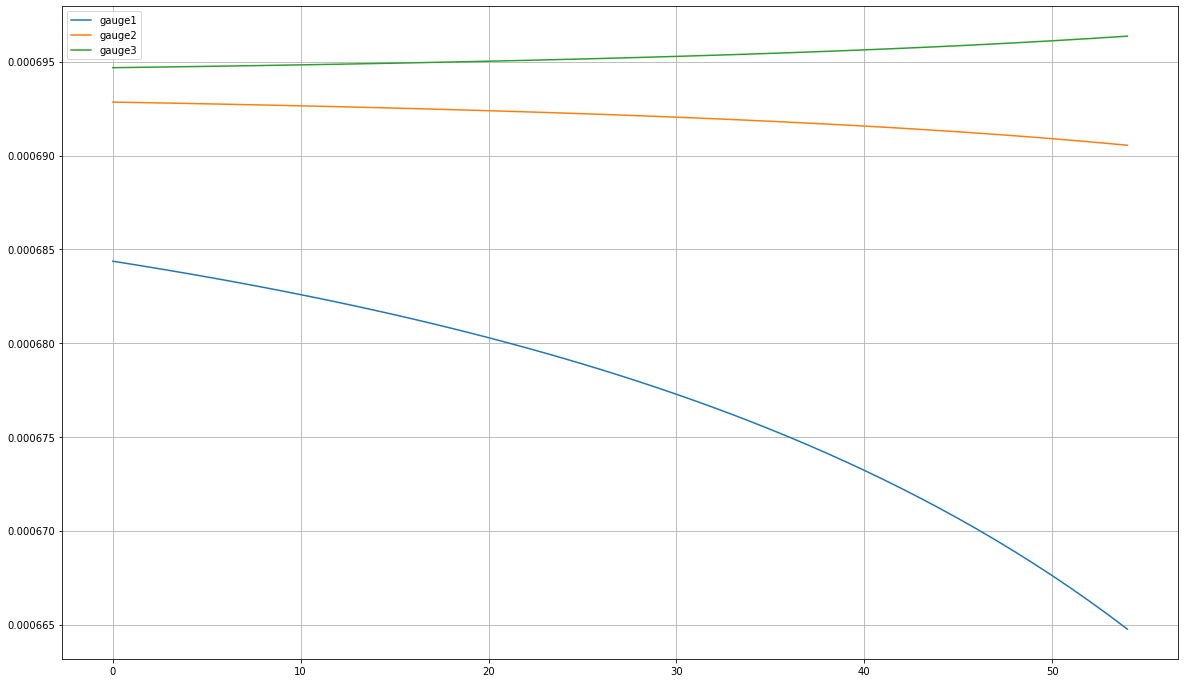

In [8]:
plt.figure(figsize=(20, 12))
plt.plot(data_test[data_test.ID == 1]['gauge1'],label= 'gauge1')
plt.plot(data_test[data_test.ID == 1][ 'gauge2'],label= 'gauge2')
plt.plot(data_test[data_test.ID == 1]['gauge3'], label= 'gauge3')
plt.grid()
plt.legend()
plt.show()

# Categorise RUL data

In [9]:
print(data_train.RUL.describe())
print(data_test.RUL.describe())

count    1.385083e+06
mean     3.477047e+04
std      2.023644e+04
min      0.000000e+00
25%      1.731200e+04
50%      3.462700e+04
75%      5.193900e+04
max      8.189600e+04
Name: RUL, dtype: float64
count     8782.000000
mean     45427.648144
std      15643.733322
min       3964.000000
25%      34177.000000
50%      46891.000000
75%      57867.500000
max      79327.000000
Name: RUL, dtype: float64


[    0.           221.6066482    886.4265928   1994.4598338
  3545.70637119  5540.16620499  7977.83933518 10858.72576177
 14182.82548476 17950.13850416 22160.66481994 26814.40443213
 31911.35734072 37451.52354571 43434.90304709 49861.49584488
 56731.30193906 64044.32132964 71800.55401662 80000.        ]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


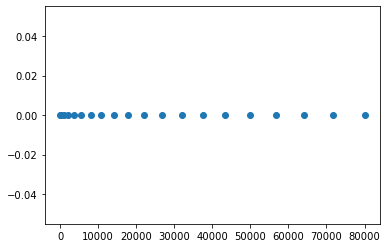

In [10]:
l=0.5
nb_bins = 20
lower_bin_bound = 0
upper_bin_bound = 80000

bins = np.linspace(lower_bin_bound, upper_bin_bound**(1-l), nb_bins)**(1/l)
labels=[i for i in range(bins.shape[0]-1)]
plt.plot(bins,np.full(bins.shape[0],0),'o')
print(bins)
print(labels)

In [11]:
data_train['RUL_bins'] = pd.cut(data_train['RUL'], bins=bins, labels=labels)
data_test['RUL_bins'] = pd.cut(data_test['RUL'], bins=bins, labels=labels)

In [12]:
display(data_train)
display(data_test)

,ID,cycle,gauge1,gauge2,gauge3,RUL,RUL_bins
0,1,0,0.000684,0.000693,0.000695,68053,17
1,1,500,0.000684,0.000693,0.000695,67553,17
2,1,1000,0.000684,0.000693,0.000695,67053,17
3,1,1500,0.000684,0.000693,0.000695,66553,17
4,1,2000,0.000684,0.000693,0.000695,66053,17
...,...,...,...,...,...,...,...
1385078,10000,66500,0.000118,0.000253,0.000761,2393,3
1385079,10000,67000,0.000097,0.000186,0.000755,1893,2
1385080,10000,67500,0.000078,0.000113,0.000743,1393,2
1385081,10000,68000,0.000060,0.000037,0.000718,893,2


,ID,cycle,gauge1,gauge2,gauge3,RUL,RUL_bins
0,1,0,0.000684,0.000693,0.000695,64540,17
1,1,500,0.000684,0.000693,0.000695,64040,16
2,1,1000,0.000684,0.000693,0.000695,63540,16
3,1,1500,0.000684,0.000693,0.000695,63040,16
4,1,2000,0.000684,0.000693,0.000695,62540,16
...,...,...,...,...,...,...,...
8777,100,22000,0.000670,0.000691,0.000696,43346,13
8778,100,22500,0.000670,0.000691,0.000696,42846,13
8779,100,23000,0.000669,0.000691,0.000696,42346,13
8780,100,23500,0.000669,0.000691,0.000696,41846,13


# Build sequences

In [13]:
#utils 
nb_gauges = 3
data_tr = data_train[data_train.ID <= 100]
data_val = data_test[data_test.ID <= 100]

#prepare forecasting data
def gen_X_sequence(id_df, seq_length, seq_cols,timesteps_pred,  type_data = None):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    
    
    ind_start = 0
    
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0+ind_start, num_elements-seq_length+1-timesteps_pred), range(seq_length+ind_start, num_elements+1-timesteps_pred)):
        yield data_array[start:stop, :]
 

def gen_Y_sequence(id_df, seq_length, seq_cols,timesteps_pred, type_data = None):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    
    
    ind_start = 0
    
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0+ind_start, num_elements-seq_length+1-timesteps_pred), range(seq_length+ind_start, num_elements+1-timesteps_pred)):
        yield data_array[stop-1, :]#data_array[start+1:stop+1, :]
   



 #prepare data
seq_cols =  ['gauge'+str(i) for i in range(1,4)]#['label'+str(i) for i in range(1,4)]
seq_cols1 =  ['RUL_bins']
sequence_length = 30
timesteps_pred = 1



#training set
seq_gen = (list(gen_X_sequence(data_tr[data_tr['ID']==id], sequence_length, seq_cols, timesteps_pred, type_data= 'train')) 
                   for id in data_tr['ID'].unique())
# generate sequences and convert to numpy array
dbX = np.concatenate(list(seq_gen))



seq_gen = (list(gen_Y_sequence(data_tr[data_tr['ID']==id], sequence_length, seq_cols1, timesteps_pred, type_data= 'train')) 
                   for id in data_tr['ID'].unique())
# generate sequences and convert to numpy array
dbY = np.concatenate(list(seq_gen))#.astype(np.long).reshape(-1,)

print(dbX.shape)
print(dbY.shape)

#test set
seq_gen = (list(gen_X_sequence(data_val[data_val['ID']==id], sequence_length, seq_cols, timesteps_pred, type_data= 'train')) 
                   for id in data_val['ID'].unique())
# generate sequences and convert to numpy array
dbX_val = np.concatenate(list(seq_gen))#.astype(np.long)

seq_gen = (list(gen_Y_sequence(data_val[data_val['ID']==id], sequence_length, seq_cols1, timesteps_pred, type_data= 'train')) 
                   for id in data_val['ID'].unique())
# generate sequences and convert to numpy array
dbY_val = np.concatenate(list(seq_gen))#.astype(np.long).reshape(-1,)

# dbX_val = (dbX_val + 1)/2
# dbY_val = (dbY_val + 1)/2
print(dbX_val.shape)
print(dbY_val.shape)

(10956, 30, 3)
(10956, 1)
(5782, 30, 3)
(5782, 1)


# Normalize data

In [14]:
dbX
dbX_val

array([[[0.00068437, 0.00069285, 0.00069468],
        [0.00068421, 0.00069283, 0.00069469],
        [0.00068404, 0.00069281, 0.00069471],
        ...,
        [0.00067827, 0.00069216, 0.0006952 ],
        [0.00067795, 0.00069212, 0.00069523],
        [0.00067762, 0.00069208, 0.00069525]],

       [[0.00068421, 0.00069283, 0.00069469],
        [0.00068404, 0.00069281, 0.00069471],
        [0.00068388, 0.00069279, 0.00069472],
        ...,
        [0.00067795, 0.00069212, 0.00069523],
        [0.00067762, 0.00069208, 0.00069525],
        [0.00067728, 0.00069204, 0.00069528]],

       [[0.00068404, 0.00069281, 0.00069471],
        [0.00068388, 0.00069279, 0.00069472],
        [0.00068371, 0.00069277, 0.00069474],
        ...,
        [0.00067762, 0.00069208, 0.00069525],
        [0.00067728, 0.00069204, 0.00069528],
        [0.00067692, 0.000692  , 0.00069531]],

       ...,

       [[0.00068095, 0.00069246, 0.00069497],
        [0.00068071, 0.00069244, 0.00069499],
        [0.00068045, 0

# One-hot encoding

In [15]:
from tensorflow.keras.utils import to_categorical

dbY = to_categorical(dbY,nb_bins)
dbY_val = to_categorical(dbY_val,nb_bins)

# Build model

In [16]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.optimizers import Adam

In [18]:
# Model based on 
model = Sequential()  # Instantiate sequential model
model.add(Conv1D(10, 10, activation='tanh', padding="same", input_shape=(dbX.shape[1], dbX.shape[2])))
#model.add(MaxPooling2D((3, 1)))
model.add(Conv1D(10, 10, activation='tanh', padding="same"))
model.add(Conv1D(10, 10, activation='tanh', padding="same"))
model.add(Conv1D(10, 10, activation='tanh', padding="same"))
model.add(Conv1D(3, 3, activation='tanh', padding="same"))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(dbY.shape[1], activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 30, 10)            310       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 30, 10)            1010      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 30, 10)            1010      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 30, 10)            1010      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 30, 3)             93        
_________________________________________________________________
flatten (Flatten)            (None, 90)                0         
_________________________________________________________________
dropout (Dropout)            (None, 90)               

In [20]:
opt = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [27]:
batch_size = 512
epochs = 100
history = model.fit(dbX, dbY, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(dbX_val, dbY_val))

Epoch 1/100
22/22 - 1s - loss: 0.1107 - accuracy: 0.4192 - val_loss: 0.1105 - val_accuracy: 0.4412
Epoch 2/100
22/22 - 1s - loss: 0.1113 - accuracy: 0.4005 - val_loss: 0.1106 - val_accuracy: 0.4166
Epoch 3/100
22/22 - 1s - loss: 0.1100 - accuracy: 0.4266 - val_loss: 0.1100 - val_accuracy: 0.4972
Epoch 4/100
22/22 - 1s - loss: 0.1101 - accuracy: 0.4200 - val_loss: 0.1113 - val_accuracy: 0.5444
Epoch 5/100
22/22 - 1s - loss: 0.1099 - accuracy: 0.4181 - val_loss: 0.1101 - val_accuracy: 0.5280
Epoch 6/100
22/22 - 1s - loss: 0.1091 - accuracy: 0.4304 - val_loss: 0.1093 - val_accuracy: 0.4810
Epoch 7/100
22/22 - 1s - loss: 0.1090 - accuracy: 0.4294 - val_loss: 0.1095 - val_accuracy: 0.5356
Epoch 8/100
22/22 - 1s - loss: 0.1088 - accuracy: 0.4348 - val_loss: 0.1088 - val_accuracy: 0.4787
Epoch 9/100
22/22 - 1s - loss: 0.1087 - accuracy: 0.4294 - val_loss: 0.1086 - val_accuracy: 0.4988
Epoch 10/100
22/22 - 1s - loss: 0.1088 - accuracy: 0.4353 - val_loss: 0.1083 - val_accuracy: 0.4984
Epoch 11/

22/22 - 1s - loss: 0.0957 - accuracy: 0.5310 - val_loss: 0.0968 - val_accuracy: 0.5536
Epoch 84/100
22/22 - 1s - loss: 0.0959 - accuracy: 0.5260 - val_loss: 0.0970 - val_accuracy: 0.5711
Epoch 85/100
22/22 - 1s - loss: 0.0957 - accuracy: 0.5288 - val_loss: 0.0987 - val_accuracy: 0.5320
Epoch 86/100
22/22 - 1s - loss: 0.0970 - accuracy: 0.5130 - val_loss: 0.1001 - val_accuracy: 0.4933
Epoch 87/100
22/22 - 1s - loss: 0.0974 - accuracy: 0.4983 - val_loss: 0.0969 - val_accuracy: 0.5277
Epoch 88/100
22/22 - 1s - loss: 0.0953 - accuracy: 0.5394 - val_loss: 0.0971 - val_accuracy: 0.5496
Epoch 89/100
22/22 - 1s - loss: 0.0956 - accuracy: 0.5312 - val_loss: 0.1000 - val_accuracy: 0.4920
Epoch 90/100
22/22 - 1s - loss: 0.0957 - accuracy: 0.5197 - val_loss: 0.0966 - val_accuracy: 0.5598
Epoch 91/100
22/22 - 1s - loss: 0.0951 - accuracy: 0.5261 - val_loss: 0.0980 - val_accuracy: 0.5356
Epoch 92/100
22/22 - 1s - loss: 0.0958 - accuracy: 0.5180 - val_loss: 0.0959 - val_accuracy: 0.5588
Epoch 93/100


In [28]:
model.evaluate(dbX_val, dbY_val)

181/181 [==============================] - 0s 2ms/step - loss: 0.0964 - accuracy: 0.5417


[0.09640707820653915, 0.5416810512542725]

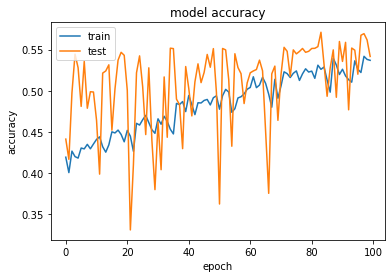

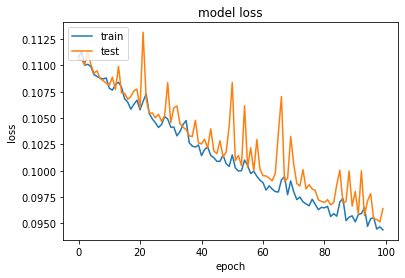

In [29]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
from datetime import datetime
dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d%m%Y%H%M%S")
model.save('PIR_CNN_Model2_' + timestampStr + '.h5')

In [31]:
model.predict(dbX_val[0:1])

array([[2.9697219e-08, 3.2402355e-11, 1.2314696e-11, 3.3024045e-11,
        2.3509489e-10, 1.9383068e-09, 1.8881959e-08, 2.1939550e-07,
        3.0779759e-06, 3.0949170e-05, 5.0112803e-04, 6.4318501e-03,
        5.4095902e-02, 1.9854429e-01, 3.6328575e-01, 3.1290710e-01,
        6.4199679e-02, 2.3828184e-08, 2.3252731e-08, 1.8877097e-08]],
      dtype=float32)

In [32]:
label = np.argmax(dbY_val[0])
print('The actual RUL is: ' + str(bins[label]) + '-' + str(bins[label+1]))
label = np.argmax(model.predict(dbX_val)[0])
print('The predicted RUL is: ' + str(bins[label]) + '-' + str(bins[label+1]))

The actual RUL is: 49861.495844875346-56731.30193905817
The predicted RUL is: 43434.903047091415-49861.495844875346
